* GeoJSON : 지도 데이터 정의 (위치/도형/속성 등 )
* -> Folium : 지도데이터의 시각화

- folium : 위도, 경도 순으로 정보 인식
- GeoJSON : 경도, 위도 순으로 정보 인식

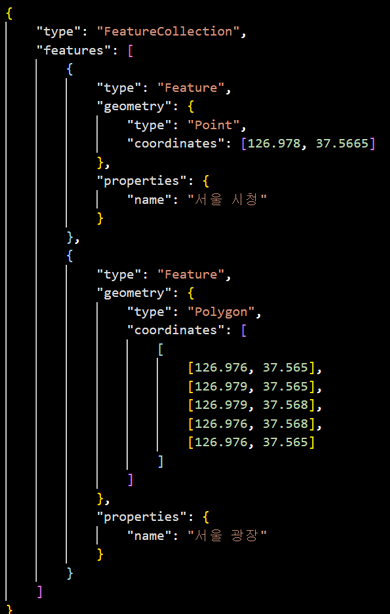

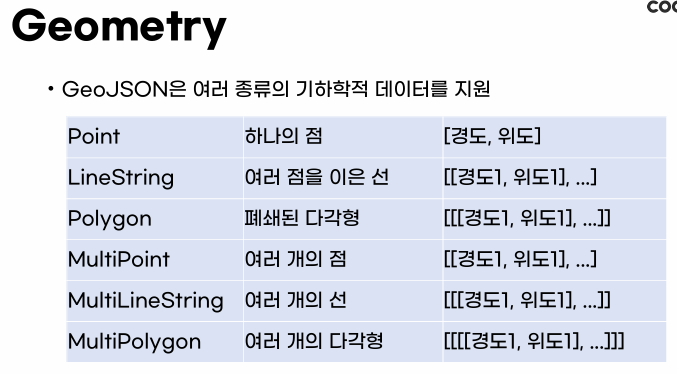

In [1]:
import folium
from geojson import Feature, FeatureCollection, Point


# 전국지도에 주요도시의 인구정보 표시

In [2]:
# GeoJson 데이터 생성
feature_1 = Feature(geometry=Point((126.978260, 37.546966)), 
                    properties={"name":"서울", "population":"970만"})
feature_2 = Feature(geometry=Point((128.930982, 35.190576)), 
                    properties={"name":"부산", "population":"340만"})
feature_3 = Feature(geometry=Point((127.382640, 36.350955)),
                     properties={"name":"대전", "population":"150만"})
feature_4 = Feature(geometry=Point((128.564583, 35.846210)),
                     properties={"name":"대구", "population":"240만"})

# 여러 GeoJSON 하나로 묶어주기 ㅡ FeatureCollection
geojson_data = FeatureCollection([feature_1, feature_2, feature_3, feature_4])

# 지도 생성
my_map = folium.Map(location=[36.351310, 127.948425], zoom_start=7)

# GeoJson collection data를 지도에 추가
folium.GeoJson(
    geojson_data, name="GeoJSON Data",
    tooltip=folium.GeoJsonTooltip(
        fields=['name', 'population'],          # 표시할 속성
        aliases=['도시이름 : ', '인구 : ']       # 속성(Feature)의 별칭
    )
).add_to(my_map)

my_map.save("./results/my_map_MainCityPopulation.html")


# 실습. GeoJSON 실습

In [12]:
import folium
from geojson import Feature, FeatureCollection, Polygon
info = [[[126.753245, 37.688282],
        [127.096222, 37.689917],
        [127.189198, 37.549174],
        [127.073494, 37.427857],
        [126.676798, 37.363841],
        [126.676798, 37.363841],
        [126.593133, 37.595784],
        [126.753245, 37.688282]]]
# 지도생성성
my_map = folium.Map(location=[37.533736, 126.977654], zoom_start=10)

# Feature 정의
feature_ = Feature(geometry=Polygon(info),
                     properties={"name":"수도권"})

# FeatureCollection
geojson_ = FeatureCollection([feature_])

# GeoJson collection data를 지도에 추가
folium.GeoJson(
    geojson_, name="GeoJSON Data",
    tooltip=folium.GeoJsonTooltip(
        fields=['name'], aliases=['수도권 : ']
    )
).add_to(my_map)

my_map.save("./results/my_map_CapitalArea.html")

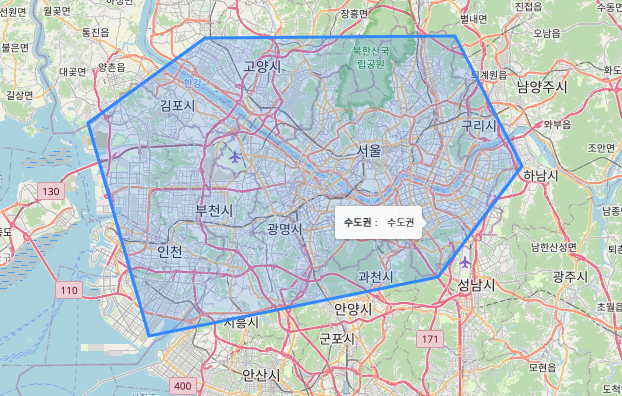

In [16]:
# 실습 ㅡ 리더님 코드
from geojson import Feature, FeatureCollection, Polygon
# GeoJSON 데이터 생성
# 1) geojson : https://geojson.io/#map=2/0/20dptj > 지역 찾기 > polygon 아이콘 선택 
#               > 영역 선택(클릭으로 영역 지정 > 우클릭으로 완료) > 우측 코드창에서 아래의 좌표 배열 가져오기기
polygon = Feature(geometry=Polygon([[
            [              127.0931262958859,              38.270959121420674            ],
            [              126.66995773974685,              37.93819906498294            ],
            [              126.61559122023857,              37.769614779597944            ],
            [              126.31658921326328,              37.79111397832001            ],
            [              126.39032065360783,              37.38190435251073            ],
            [              126.91840221546016,              36.8928635189484            ],
            [              127.16691801469403,              36.95816824849258            ],
            [              127.27172232696688,              36.902431925127374            ],
            [              127.77247575024859,              37.19662369522865            ],
            [              127.81881171385675,              37.560558884209485            ],
            [              127.53941969771728,              37.62817781043199            ],
            [              127.64814042497483,              37.91655708013978            ],
            [              127.0931262958859,              38.270959121420674            ]
            ]]), properties={'name': "수도권"})

# FeatureCollection
geojson_data = FeatureCollection([polygon])

# 지도생성성
my_map = folium.Map(location=[37.533736, 126.977654], zoom_start=8)

# 지도에 그리기기
folium.GeoJson(
    geojson_data, name="GeoJSON Data",
    tooltip=folium.GeoJsonTooltip(
        fields=['name'], aliases=['영역이름 : ']
    ), 
    style_function=lambda _:{
        'fillColor' : 'purple',
        'color' : 'black',
        'weight' : 2,
        'fillOpacity' : 0.5
    }
).add_to(my_map)

my_map.save("./results/my_map_Leader_CapitalArea.html")

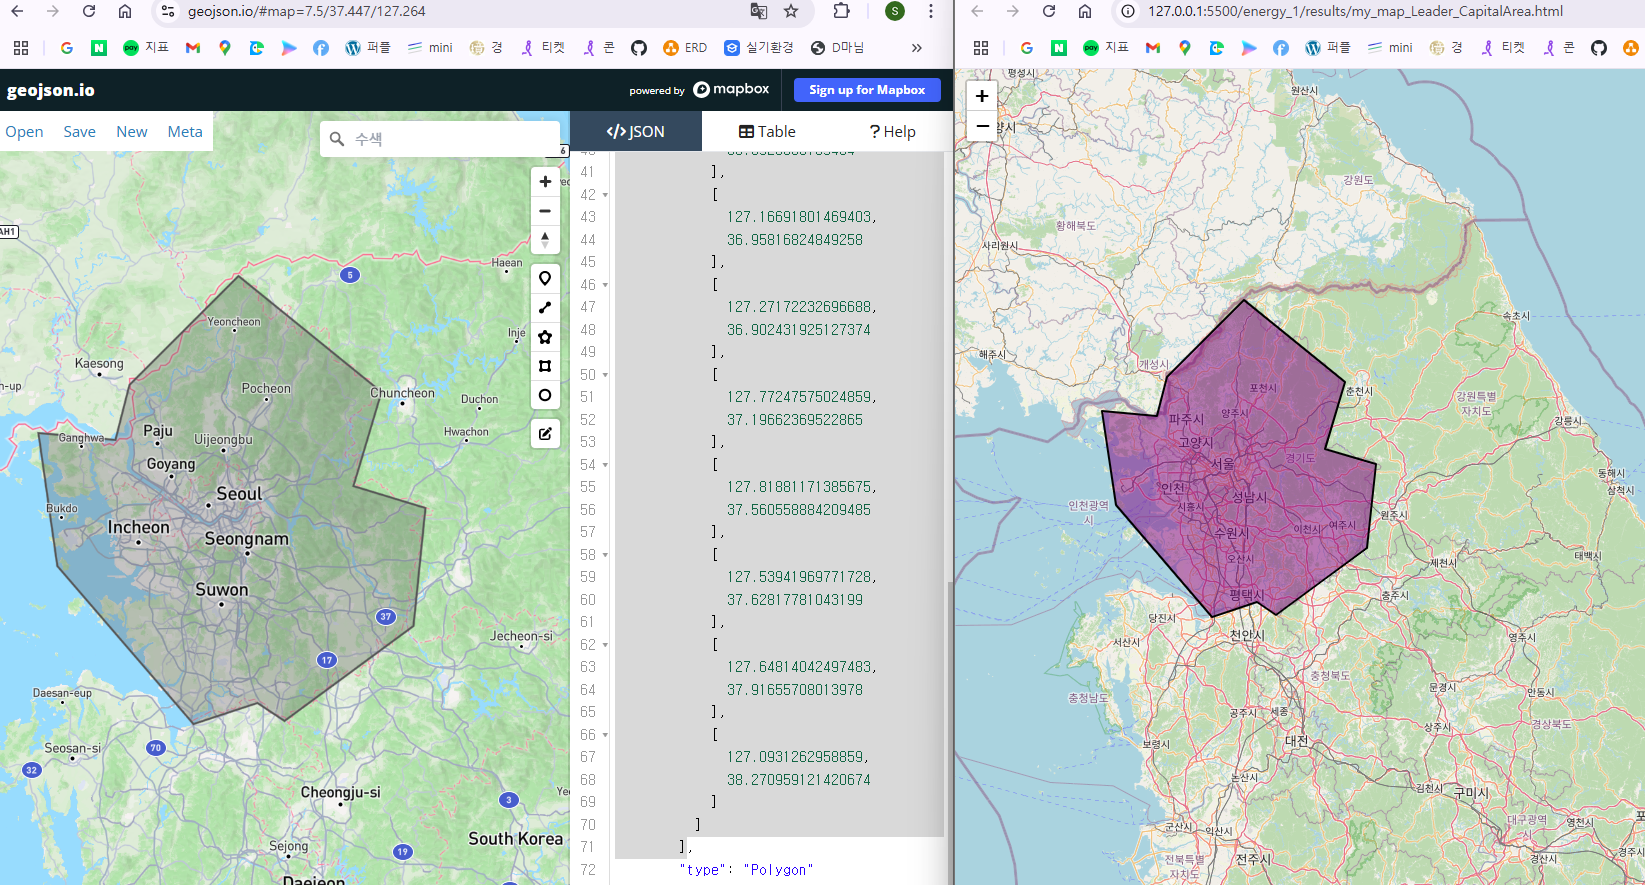